In [1]:
#clustering

In [2]:
# import sys
# import cuentitas
# from entornomaximo import entornoMaximo as em
# from auxiliares import integracionGauss as ig
# from auxiliares import medicion
# from auxiliares import sigma
# from auxiliares import sigmaEmi
# from auxiliares import S0VV_completo
from auxiliares import generadorFran1Capa  #generador, generador1E, generadorEmisividad, 

# from numpy import pi, sqrt, sin, cos, exp, log10, array, real, conj
import numpy as np
# import matplotlib
from matplotlib import pyplot as plt
# from scipy import interpolate
import seaborn as sns
import pandas as pd
# import glob
# import theano.tensor as TT
# import random

# import time

# import pymc3 as pm

sns.set() #seaborn como default

In [21]:
fileName = 'DeltaTrazas.txt'

In [328]:
# dataDir = '/home/fran/proyectos/TesisJavi/1capa/set2-1Capa-noNoise-1s0+0emi-3000/'

# dataDir = '/home/fran/proyectos/TesisJavi/1capa/set1-1Capa-noNoise-3s0+1emi-10000/'

# dataDir = '/home/fran/proyectos/TesisJavi/2capas/set1-noNoise-3s0+emi-10000/'

dataDir = '/home/fran/proyectos/TesisJavi/1capa/set2-1Capa-noNoise-1s0+1emi-20000/'

In [311]:
traza = np.genfromtxt(dataDir+fileName, delimiter=';')

In [312]:
traza.shape

(3, 80000)

In [313]:
plotear = np.stack((traza[0, :], traza[1, :], traza[2, :])).T
dfplotear = pd.DataFrame(plotear, columns = ['ep','s','l'])

In [314]:
dfplotear

,ep,s,l
0,1.823891,0.002657,0.016685
1,4.174563,0.000955,0.011033
2,2.181871,0.002033,0.016138
3,6.012541,0.000901,0.007444
4,7.418940,0.000986,0.005703
...,...,...,...
79995,4.038842,0.003579,0.001900
79996,5.491679,0.000981,0.007134
79997,3.076581,0.001201,0.011860
79998,1.580042,0.002985,0.010535


In [315]:
ep_ = 4
s_ = 0.001
l_ = 0.01 #set2

In [316]:
modelInReduced = [ep_, s_, l_]

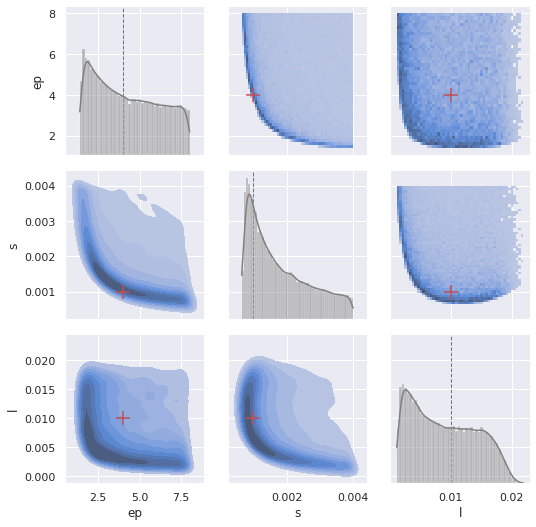

In [317]:
f = sns.PairGrid(dfplotear)
# f.fig.suptitle(Nombre, y=1.01, fontsize = 'large')
f.map_upper(sns.histplot)

f.map_lower(sns.kdeplot, fill=True)
f.map_diag(sns.histplot, kde=True, color='.5')

for i in range(3):
    for j in range(3):
        if i == j:
            #ploteo el valor verdadero en las marginales
            f.axes[j,i].axvline(modelInReduced[i], color='r', linestyle='dashed', linewidth=1)
        else:
            f.axes[j,i].scatter(modelInReduced[i], modelInReduced[j], marker="+", c='r', s=200) #color='k', linestyle='dashed', linewidth=1)
   

/home/fran/miniconda3/envs/bayes/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


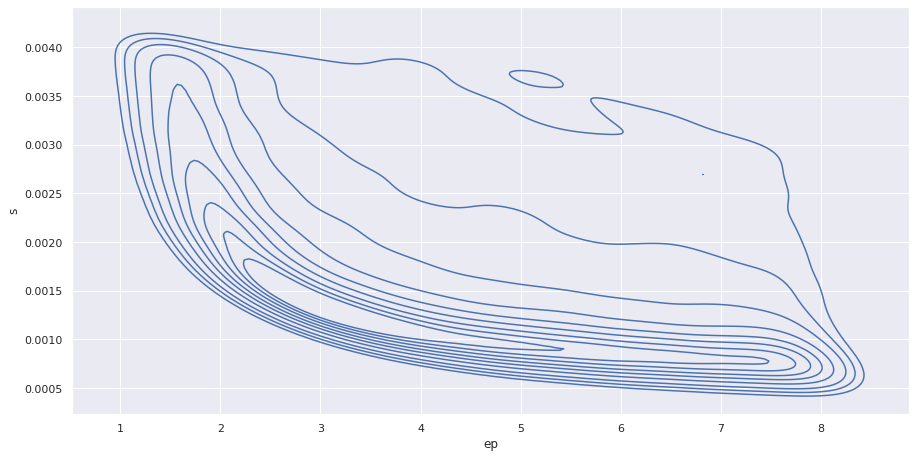

In [318]:
fig_ = plt.figure(figsize=(15, 7.5))
qq_ = sns.kdeplot(dfplotear.ep, dfplotear.s)

In [105]:
# help(density.get_xaxis())

In [319]:
from sklearn.neighbors import KernelDensity


In [320]:
# from scipy import stats

In [321]:
# # instantiate and fit the KDE model
# kde = KernelDensity(bandwidth=0.5, kernel='gaussian')
# kde.fit(X)

# # score_samples returns the log of the probability density
# logprob = kde.score_samples(X_resampled)

# plt.fill_between(X_resampled.flatten(), np.exp(logprob), alpha=0.8)
# # plt.plot(X, np.full_like(X, -0.01), '|k', markeredgewidth=1)
# # plt.ylim(-0.02, 0.22)

In [322]:
X = traza[:2,:].T

In [323]:
X.shape

(80000, 2)

In [324]:
data = X

In [325]:
data.shape

(80000, 2)

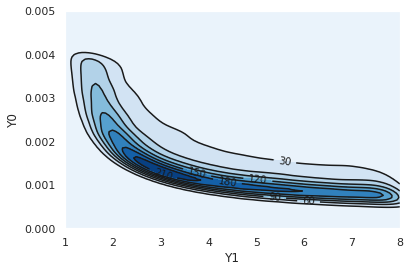

In [326]:
# import numpy as np
# import matplotlib.pyplot as pl
import scipy.stats as st

# data = np.random.multivariate_normal((0, 0), [[0.8, 0.05], [0.05, 0.7]], 100)
x = data[:, 0]
y = data[:, 1]
xmin, xmax = 1, 8
ymin, ymax = 0.00, 0.005

# Peform the kernel density estimate
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])


kernel = st.gaussian_kde(values)
# kernel = kde.score_samples(values)

f = np.reshape(kernel(positions).T, xx.shape)

fig = plt.figure()
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# Contourf plot
cfset = ax.contourf(xx, yy, f, cmap='Blues')
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
# Contour plot
cset = ax.contour(xx, yy, f, colors='k')
# Label plot
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('Y1')
ax.set_ylabel('Y0')

pl.show()

In [327]:
#correlaciones

In [ ]:
(dfplotear.ep > 6) dfplotear.s

In [229]:
X = traza[:2,:1000].T

In [230]:
X.shape

(1000, 2)

In [239]:
X_resampled_1 = np.linspace(1, 8, 1000)
X_resampled_2 = np.linspace(0, 0.04, 1000)

In [247]:
X_resampled = np.vstack((X_resampled_1, X_resampled_2)).T

In [248]:
X_resampled.shape

(1000, 2)

In [249]:
# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=0.5, kernel='gaussian')
kde.fit(X)

KernelDensity(bandwidth=0.5)

In [250]:
logprob = kde.score_samples(X_resampled)

In [255]:
X_resampled.shape

(1000, 2)

ValueError: 'x' is not 1-dimensional

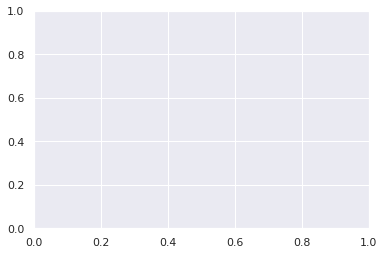

In [252]:


# score_samples returns the log of the probability density
# logprob = kde.score_samples(X_resampled)

plt.fill_between(X_resampled, np.exp(logprob), alpha=0.8)

In [142]:
# line = density.lines[0]
# x, y = line.get_data()

# fig, ax = plt.subplots()
# ax.plot(x[x>0], y[x>0])

# X = traza[:
X = traza[:2,:].T
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X)

In [152]:
X.shape

(12000, 2)

In [ ]:
x_d = np.linspace(1, 8, 100)

In [148]:
Xq,Yq = np.mgrid[1:9:0.01, 0:0.004:0.0001]

In [150]:
Xq

array([[1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.01, 1.01, 1.01, ..., 1.01, 1.01, 1.01],
       [1.02, 1.02, 1.02, ..., 1.02, 1.02, 1.02],
       ...,
       [8.97, 8.97, 8.97, ..., 8.97, 8.97, 8.97],
       [8.98, 8.98, 8.98, ..., 8.98, 8.98, 8.98],
       [8.99, 8.99, 8.99, ..., 8.99, 8.99, 8.99]])

In [151]:
kde.score_samples(Xq)

ValueError: query data dimension must match training data dimension

In [ ]:
kde.

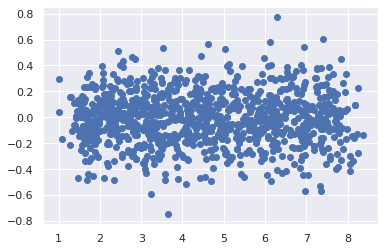

In [93]:
est_ = kde.sample(1000)
plt.scatter(est_[:,0], est_[:,1])

In [91]:
est_[:,0]

array([2.17890926, 5.56347633, 7.76059151, 5.29952501, 6.47071071,
       4.13402843, 3.50308619, 4.75911999, 5.78784005, 2.49474117,
       7.63221784, 2.88669197, 5.25170291, 2.87739937, 6.9912963 ,
       3.79785263, 5.90133385, 5.86964266, 5.93869728, 5.65224831,
       2.16807444, 5.10533502, 1.8614679 , 7.55285379, 3.22505208,
       6.23682373, 3.26868213, 2.71230363, 4.25743459, 1.63752422,
       2.7824955 , 7.0578656 , 2.88725465, 3.32374839, 5.86472463,
       6.22072657, 2.39064682, 2.28740272, 6.10825049, 3.86507342,
       5.48091811, 3.45858894, 2.39267165, 8.15371508, 6.52998423,
       2.85406046, 6.55735616, 3.74685185, 5.26476356, 3.50100078,
       8.03161799, 7.83551308, 4.93190626, 2.78459686, 3.46268083,
       4.35105853, 5.97801098, 3.70807495, 4.89747213, 3.56647268,
       5.72045837, 1.72456818, 4.69370274, 6.06313482, 5.8920288 ,
       2.81863857, 4.13376848, 6.47863121, 4.75345862, 3.8236267 ,
       6.62111   , 4.06450575, 5.37065735, 7.20093544, 4.59226

In [59]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

In [60]:
X.shape

(6, 2)

In [62]:
traza[:2,:].shape

(2, 12000)

In [113]:


def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(1000)



In [115]:
x.shape

(1000,)

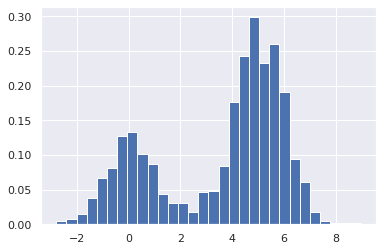

In [117]:


hist = plt.hist(x, bins=30, density=True)



In [118]:


x = make_data(20)
bins = np.linspace(-5, 10, 10)



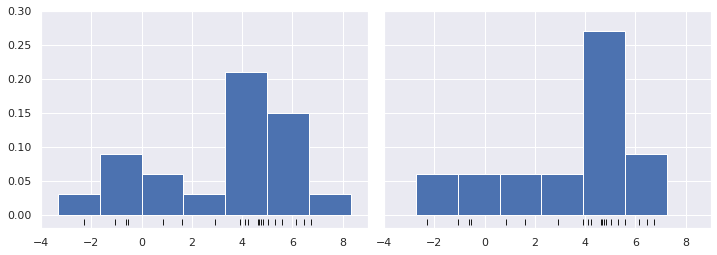

In [120]:


fig, ax = plt.subplots(1, 2, figsize=(12, 4),
                       sharex=True, sharey=True,
                       subplot_kw={'xlim':(-4, 9),
                                   'ylim':(-0.02, 0.3)})
fig.subplots_adjust(wspace=0.05)
for i, offset in enumerate([0.0, 0.6]):
    ax[i].hist(x, bins=bins + offset, density=True)
    ax[i].plot(x, np.full_like(x, -0.01), '|k',
               markeredgewidth=1)



In [139]:
# from scipy.stats import norm
# x_d = np.linspace(-4, 8, 1000)
# density = sum(norm(xi).pdf(x_d) for xi in x)

# plt.fill_between(x_d, density, alpha=0.5)
# plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)

# plt.axis([-4, 8, -0.2, 5]);

In [124]:
x.shape

(20,)

(-0.02, 0.22)

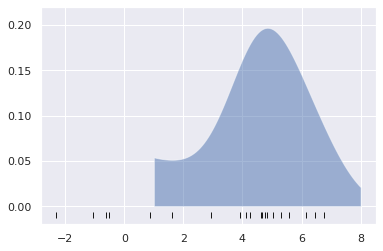

In [140]:
# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(x[:, None])

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22)

In [141]:
logprob

array([-2.92011905, -2.92999845, -2.939001  , -2.94707905, -2.95417036,
       -2.96019359, -2.96504469, -2.96859454, -2.97068796, -2.97114459,
       -2.96976155, -2.9663181 , -2.96058238, -2.95231992, -2.94130367,
       -2.92732511, -2.91020572, -2.8898079 , -2.86604478, -2.83888772,
       -2.8083712 , -2.7745944 , -2.73771957, -2.69796728, -2.6556091 ,
       -2.61095841, -2.56436013, -2.51618014, -2.46679518, -2.41658356,
       -2.36591731, -2.31515567, -2.26464018, -2.21469113, -2.16560531,
       -2.11765479, -2.07108654, -2.02612277, -1.98296164, -1.94177835,
       -1.90272639, -1.86593889, -1.83152999, -1.79959618, -1.77021753,
       -1.74345896, -1.71937124, -1.69799206, -1.6793469 , -1.66344989,
       -1.65030458, -1.63990466, -1.63223464, -1.6272705 , -1.62498043,
       -1.62532543, -1.6282601 , -1.63373337, -1.64168932, -1.6520681 ,
       -1.66480687, -1.67984088, -1.69710456, -1.71653272, -1.7380618 ,
       -1.76163115, -1.78718433, -1.81467038, -1.84404506, -1.87